

---

---




# Treinamento de uma rede MLP para relação XOR - Integrando Keras e Scikit-learn

Este notebook mostra o uso do [API Keras](https://keras.io/api/models/) para criar e treinar uma rede Perceptrons Multicamadas (Multi-Layers Perceptrons - MLP) para a relação lógica XOR, e integra o Keras com sklearn por meio da função [KerasClassifier](https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasClassifier) que encapsula o modelo Keras em um estimador/modelo compatível com sk_learn, permitindo assim o uso das funções do sklearn sobre o modelo utilizado. 

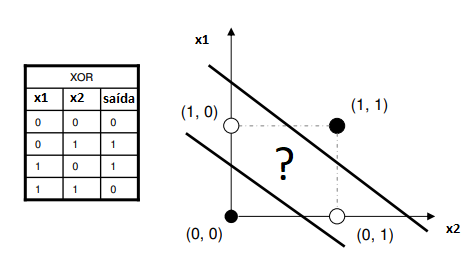




---

---





## Função que mostra as fronteiras de decisão 

Baseada em: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plota_fronteira_decisao(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.RdBu
  #cm = plt.cm.bone
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'decision_function'):
    Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, abs(Z), cmap=cm, alpha=0.8)
  plt.colorbar()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0))
  plt.yticks((0.0, 1.0))
  plt.title(title)


## Relação XOR



In [ ]:
import numpy as np
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=float)
# Saídas XOR
y_XOR = np.array([0, 1, 1, 0])

## Cria e treina uma rede MLP - configuração mínima para o XOR

Cria e treina rede uma rede MLP com dois neurônios na camada escondida (intermediária), a qual é encapsulada num estimador/modelo compatível com sk_learn por meio da função [KerasClassifier](https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasClassifier). 

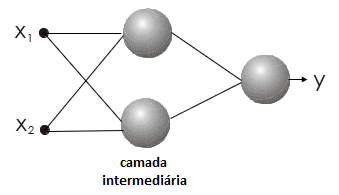

**Configuração mínima para o aprendizado da relação XOR.**

In [ ]:
!python -m pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier

# função que cria o modelo (rede neural) no padrão Keras
def create_model(num_neurons):
    model = Sequential()
    #adiciona camadas
    model.add(Dense(num_neurons, activation='sigmoid', input_shape=(2,)))
    model.add(Dense(1))
    sgd = SGD(learning_rate=0.25)
    model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])
    return model

# Encapsula o modelo Keras em um estimador/modelo compatível com sk_learn
mlp = KerasClassifier(create_model, num_neurons = 2, epochs=2000)
mlp.fit(X,y_XOR)

Epoch 1/2000
1/1 [==============================] - 0s 261ms/step - loss: 1.6113 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2615 - accuracy: 0.7500
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2518 - accuracy: 0.7500
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2516 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2514 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2513 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2512 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2512 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2511 - accuracy: 0.5000
Epoch 11/2000
1

KerasClassifier(
	model=<function create_model at 0x7fd63e1d6c20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=2000
	num_neurons=2
	class_weight=None
)

## Predição (teste da rede MLP treinada)


In [ ]:
mlp.predict(X)
#np.argmax(mlp.predict(X), axis=-1)

1/1 [==============================] - 0s 34ms/step


array([0, 1, 1, 0])

## Plota a fronteira de decisão

379/379 [==============================] - 0s 1ms/step


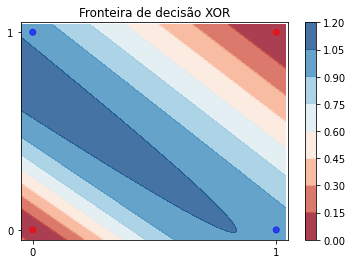

In [ ]:
plota_fronteira_decisao(mlp, X, y_XOR, 'Fronteira de decisão XOR')

## Probabilidades estimadas para cada classe

O método [.predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba) mostra as probilidades estimadas pelo modelo (classificador) MLP para cada uma das classes: classe 0 e classe 1.

In [ ]:
print("Probabilidades estimadas:\n [Classe 0, Classe 1]\n",mlp.predict_proba(X))

1/1 [==============================] - 0s 15ms/step
Probabilidades estimadas:
 [Classe 0, Classe 1]
 [[9.9999917e-01 8.3446503e-07]
 [1.4305115e-06 9.9999857e-01]
 [1.3113022e-06 9.9999869e-01]
 [9.9999785e-01 2.1457672e-06]]


## Cria e treina outra rede MLP (com mais neurônios)

Cria e treina rede uma rede MLP com 5 neurônios na camada escondida e encapsula num estimador/modelo compatível com o sklearn.

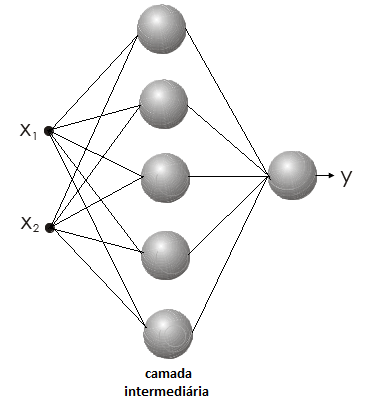

In [ ]:
# Criando uma rede MLP
# Encapsula o modelo Keras em um estimador/modelo compatível com sk_learn
mlp2 = KerasClassifier(create_model, num_neurons = 5, epochs=2000)

# Treinando a rede
mlp2.fit(X, y_XOR)

Epoch 1/2000
1/1 [==============================] - 0s 242ms/step - loss: 0.7273 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3161 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2616 - accuracy: 0.7500
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2542 - accuracy: 0.2500
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2527 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2522 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2520 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.5000
Epoch 11/2000
1/1

KerasClassifier(
	model=<function create_model at 0x7fd63e1d6c20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=2000
	num_neurons=5
	class_weight=None
)

In [ ]:
mlp2.predict(X)

1/1 [==============================] - 0s 36ms/step


array([0, 1, 1, 0])

379/379 [==============================] - 1s 1ms/step


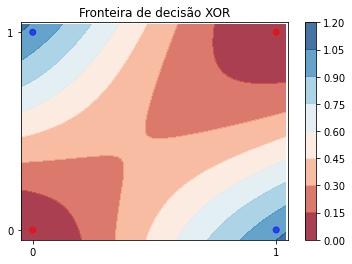

In [ ]:
plota_fronteira_decisao(mlp2, X, y_XOR, 'Fronteira de decisão XOR')

In [ ]:
print("Probabilidades estimadas:\n [Classe 0, Classe 1]\n",mlp2.predict_proba(X))

1/1 [==============================] - 0s 16ms/step
Probabilidades estimadas:
 [Classe 0, Classe 1]
 [[9.9999905e-01 9.5367432e-07]
 [1.4305115e-06 9.9999857e-01]
 [1.5497208e-06 9.9999845e-01]
 [9.9999791e-01 2.0861626e-06]]
